# Co-encapsulated K-562 and HEK293 cells

In [1]:
import pandas as pd
print("Pandas imported successfully, version: "+pd.__version__)

import numpy as np
print("Numpy imported successfully, version: "+np.__version__)


import scipy as sm
from scipy.stats import *
print("SciPy imported successfully, version: "+sm.__version__)

import seaborn as sns
print("Seaborn imported successfully, version: "+sns.__version__)

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

sns.set_style("ticks")

Pandas imported successfully, version: 1.3.4
Numpy imported successfully, version: 1.21.2
SciPy imported successfully, version: 1.7.3
Seaborn imported successfully, version: 0.11.2


In [2]:
# This way is convenient when more than one csv file is uploaded

experiment_list = [
    
    [ "output_crops.csv", "K562 and HEK293,","30 cycles, + Nuclei"],
    
]

In [3]:
data_all = pd.DataFrame()

for datafile in experiment_list:
    tmp = pd.read_csv(datafile[0], sep=',')
    tmp["Cell"] = datafile[1]
    tmp["Condition"] = datafile[2]
    
    # Append the data portion to whole data structure
    data_all = data_all.append(tmp, ignore_index=True )
    
data_all = data_all.loc[~data_all["class"].isna(),]        

# Log data
actb_tmp = data_all["ACTB_mean"].copy()
data_all["YAP_mean"]-=0.1*actb_tmp

data_all["YAP-log"] = np.log10(data_all["YAP_mean"])
data_all["PTPRC-log"] = np.log10(data_all["PTPRC_mean"])
data_all["ACTB-log"] = np.log10(data_all["ACTB_mean"])
data_all["ACTB-peak-log"] = np.log10(data_all["ACTB_max"])

In [4]:
data_all.head(3)

,Unnamed: 0,image,crop_id,particle_id,X,Y,radius_px,radius_um,overlapping,filtered,...,YAP_sd,YAP_min,YAP_max,class,Cell,Condition,YAP-log,PTPRC-log,ACTB-log,ACTB-peak-log
0,0,0,0,0,564,175,63,63.0,False,True,...,0.974408,1.0,8.0,Empty,"K562 and HEK293,","30 cycles, + Nuclei",0.411207,0.275716,0.498624,0.845098
1,1,0,1,1,1710,397,64,64.0,False,True,...,0.984003,1.0,7.0,Empty,"K562 and HEK293,","30 cycles, + Nuclei",0.385709,0.276383,0.437692,0.903090
2,2,0,2,2,297,151,62,62.0,False,True,...,0.962483,1.0,8.0,Empty,"K562 and HEK293,","30 cycles, + Nuclei",0.406388,0.231585,0.536035,0.845098


<AxesSubplot:xlabel='radius_px', ylabel='Count'>

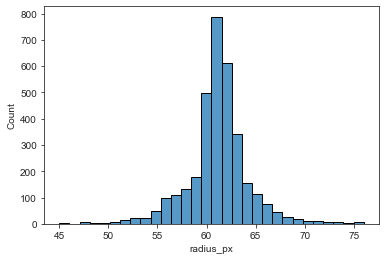

In [5]:
plt.figure()
sns.histplot(data=data_all, x="radius_px", bins=30,edgecolor="k")

In [6]:
# Filter the data based on radius_px

filtered_data_1 = data_all["radius_px"]>45
new_data = data_all.loc[filtered_data_1, ]

In [7]:
new_data.shape

(3360, 41)

In [8]:
# Additional filtering to remove overlaping  measurements

filtered_data_2 = new_data["filtered"]==True
new_data_2 = new_data.loc[filtered_data_2, ]

In [9]:
new_data_2.shape

(3360, 41)

<AxesSubplot:xlabel='YAP-log', ylabel='Count'>

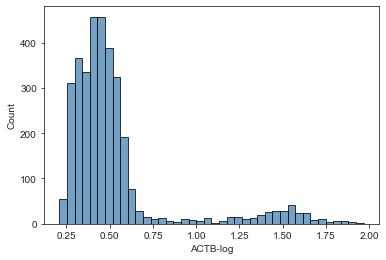

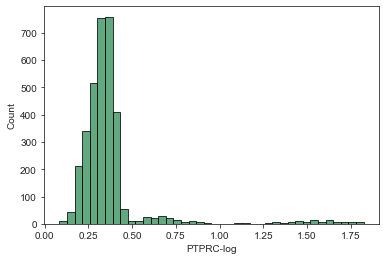

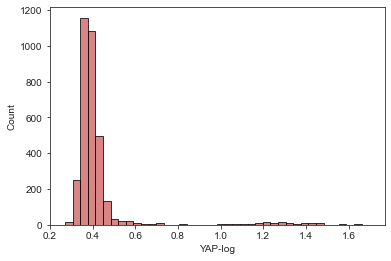

In [10]:
# Histogram of each marker

plt.figure()
sns.histplot(data=new_data_2, x="ACTB-log", bins=40, color="steelblue",edgecolor="k")
plt.figure()
sns.histplot(data=new_data_2, x="PTPRC-log", bins=40, color="seagreen", edgecolor="k")
plt.figure()
sns.histplot(data=new_data_2, x="YAP-log", bins=40, color="indianred", edgecolor="k")

In [11]:
# Add additional column with marker name

thresholds = dict()
thresholds["ACTB-log"] = 1.05
thresholds["PTPRC-log"] = 1.1
thresholds["YAP-log"] = 0.9

new_data_2['Marker'] = 'Empty'

new_data_2.loc[new_data_2["ACTB-log"] > thresholds["ACTB-log"], "Marker"] = 'ACTB'
new_data_2.loc[new_data_2["YAP-log"] > thresholds["YAP-log"], "Marker"] = 'YAP'
new_data_2.loc[new_data_2["PTPRC-log"] > thresholds["PTPRC-log"], "Marker"] = 'PTPRC'

new_data_2.loc[(new_data_2["ACTB-log"] > thresholds["ACTB-log"]) & (new_data_2["PTPRC-log"] > thresholds["PTPRC-log"]), "Marker"] = 'ACTB and PTPRC'
new_data_2.loc[(new_data_2["ACTB-log"] > thresholds["ACTB-log"]) & (new_data_2["YAP-log"] > thresholds["YAP-log"]), "Marker"] = 'ACTB and YAP'
new_data_2.loc[(new_data_2["PTPRC-log"] > thresholds["PTPRC-log"]) & (new_data_2["YAP-log"] > thresholds["YAP-log"]), "Marker"] = 'PTPRC and YAP'

new_data_2.loc[(new_data_2["ACTB-log"] > thresholds["ACTB-log"]) & (new_data_2["YAP-log"] > thresholds["YAP-log"]) & (new_data_2["PTPRC-log"] > thresholds["PTPRC-log"]), "Marker"] = 'ACTB, PTPRC and YAP'

In [12]:
new_data_2["Marker"].unique()

array(['Empty', 'ACTB', 'ACTB and PTPRC', 'ACTB and YAP', 'YAP',
       'ACTB, PTPRC and YAP'], dtype=object)

In [13]:
# Add additional column describing the presence of marker and nuclei


new_data_2['Final marker'] = 'Empty'

new_data_2.loc[(new_data_2["Marker"] == "Empty") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "Nuclei"

new_data_2.loc[(new_data_2["Marker"] == "ACTB") & (new_data_2["class"] == "Empty"), "Final marker"] = "ACTB"
new_data_2.loc[(new_data_2["Marker"] == "PTPRC") & (new_data_2["class"] == "Empty"), "Final marker"] = "PTPRC"
new_data_2.loc[(new_data_2["Marker"] == "YAP") & (new_data_2["class"] == "Empty"), "Final marker"] = "YAP"

new_data_2.loc[(new_data_2["Marker"] == "ACTB and PTPRC") & (new_data_2["class"] == "Empty"), "Final marker"] = "ACTB & PTPRC"
new_data_2.loc[(new_data_2["Marker"] == "ACTB and YAP") & (new_data_2["class"] == "Empty"), "Final marker"] = "ACTB & YAP"
new_data_2.loc[(new_data_2["Marker"] == "ACTB, PTPRC and YAP") & (new_data_2["class"] == "Empty"), "Final marker"] = "ACTB,PTPRC & YAP"
new_data_2.loc[(new_data_2["Marker"] == "PTPRC and YAP") & (new_data_2["class"] == "Empty"), "Final marker"] = "PTPRC & YAP"

new_data_2.loc[(new_data_2["Marker"] == "ACTB") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "ACTB & Nuclei"
new_data_2.loc[(new_data_2["Marker"] == "PTPRC") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "PTPRC & Nuclei"
new_data_2.loc[(new_data_2["Marker"] == "YAP") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "YAP & Nuclei"

new_data_2.loc[(new_data_2["Marker"] == "ACTB and PTPRC") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "ACTB,PTPRC & Nuclei"
new_data_2.loc[(new_data_2["Marker"] == "ACTB and YAP") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "ACTB,YAP & Nuclei"
new_data_2.loc[(new_data_2["Marker"] == "ACTB, PTPRC and YAP") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "ACTB,PTPRC,YAP & Nuclei"
new_data_2.loc[(new_data_2["Marker"] == "PTPRC and YAP") & (new_data_2["class"] == "Nucleus"), "Final marker"] = "PTPRC,YAP & Nuclei"

new_data_2.shape
new_data_2["Final marker"].unique()

array(['Empty', 'ACTB', 'ACTB,PTPRC & Nuclei', 'ACTB,YAP & Nuclei',
       'ACTB & Nuclei', 'YAP & Nuclei', 'ACTB,PTPRC,YAP & Nuclei',
       'Nuclei', 'ACTB & YAP'], dtype=object)

In [14]:
# Select microcapsules that are not empty based on the final marker

no_empty_mask = new_data_2["Final marker"]!="Empty"
cells_ambient = new_data_2.loc[no_empty_mask, ]

In [15]:
cells_ambient.shape

(305, 43)

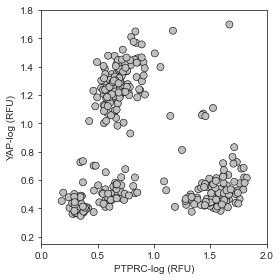

In [16]:
# Plot microcapsules with cells and ambient RNA (all selected microcapsules)

X0, X1 = 0, 2.0
Y0, Y1 = 0.15, 1.8

color_dict = {'ACTB':'silver',
              'PTPRC':'silver',
              'YAP': 'silver',
              
              'ACTB & Nuclei': 'silver',
              'PTPRC & Nuclei': 'silver',
              'YAP & Nuclei':'silver',
              
              'ACTB & PTPRC': 'silver',
              'ACTB & YAP': 'silver',
              'PTPRC & YAP': 'silver',
              'ACTB,PTPRC & YAP': 'silver',
           
              
              'ACTB,PTPRC & Nuclei': 'silver',
              'ACTB,YAP & Nuclei': 'silver',
              'PTPRC,YAP & Nuclei':'silver',
              'ACTB,PTPRC,YAP & Nuclei': 'silver',
              
              'Nuclei': 'silver'}


fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.xlim(X0,X1)
plt.ylim(Y0,Y1)

sns.scatterplot(data=cells_ambient, x="PTPRC-log", y="YAP-log", hue = 'Final marker', palette=color_dict, legend=False, edgecolor="k", s=50)
plt.xlabel("PTPRC-log (RFU)")
plt.ylabel("YAP-log (RFU)")

plt.tight_layout()

plt.savefig("Cells_Ambient.svg", format="svg", dpi=300)

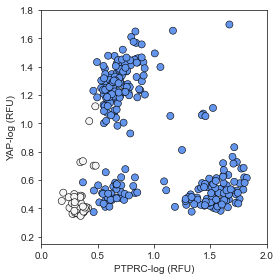

In [17]:
# Plot microcapsules with cells

X0, X1 = 0, 2.0
Y0, Y1 = 0.15, 1.8

color_dict = {'ACTB':'whitesmoke',
              'PTPRC':'whitesmoke',
              'YAP': 'whitesmoke',
              
              'ACTB & Nuclei': 'cornflowerblue',
              'PTPRC & Nuclei': 'cornflowerblue',
              'YAP & Nuclei':'cornflowerblue',
              
              'ACTB & PTPRC': 'whitesmoke',
              'ACTB & YAP': 'whitesmoke',
              'PTPRC & YAP': 'whitesmoke',
              'ACTB,PTPRC & YAP': 'whitesmoke',
              
              'ACTB,PTPRC & Nuclei': 'cornflowerblue',
              'ACTB,YAP & Nuclei': 'cornflowerblue',
              'PTPRC,YAP & Nuclei':'cornflowerblue',
              'ACTB,PTPRC,YAP & Nuclei': 'cornflowerblue',
              
              'Nuclei': 'cornflowerblue'}


fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.xlim(X0,X1)
plt.ylim(Y0,Y1)

sns.scatterplot(data=cells_ambient, x="PTPRC-log", y="YAP-log", hue = 'Final marker', palette=color_dict, legend=False, edgecolor="k", s=50)

plt.xlabel("PTPRC-log (RFU)")
plt.ylabel("YAP-log (RFU)")

plt.tight_layout()


plt.savefig("Cells.svg", format="svg", dpi=300)

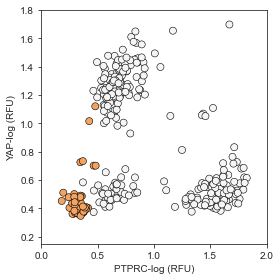

In [18]:
# Plot microcapsules with ambient RNA

X0, X1 = 0, 2.0
Y0, Y1 = 0.15, 1.8

color_dict = {'ACTB':'sandybrown',
              'PTPRC':'sandybrown',
              'YAP': 'sandybrown',
              
              'ACTB & Nuclei': 'whitesmoke',
              'PTPRC & Nuclei': 'whitesmoke',
              'YAP & Nuclei':'whitesmoke',
              
              'ACTB & PTPRC': 'sandybrown',
              'ACTB & YAP': 'sandybrown',
              'PTPRC & YAP': 'sandybrown',
              'ACTB,PTPRC & YAP': 'sandybrown',
              
              'ACTB,PTPRC & Nuclei': 'whitesmoke',
              'ACTB,YAP & Nuclei': 'whitesmoke',
              'PTPRC,YAP & Nuclei':'whitesmoke',
              'ACTB,PTPRC,YAP & Nuclei': 'whitesmoke',
              
              'Nuclei': 'whitesmoke'}


fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.xlim(X0,X1)
plt.ylim(Y0,Y1)

sns.scatterplot(data=cells_ambient, x="PTPRC-log", y="YAP-log", hue = 'Final marker', palette=color_dict, legend=False, edgecolor="k", s=50)

plt.xlabel("PTPRC-log (RFU)")
plt.ylabel("YAP-log (RFU)")

plt.tight_layout()

plt.savefig("Ambient.svg", format="svg", dpi=300)

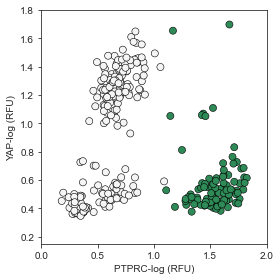

In [19]:
# Plot microcapsules with PTPRC signal

X0, X1 = 0, 2.0
Y0, Y1 = 0.15, 1.8

color_dict = {'ACTB':'whitesmoke',
              'PTPRC':'seagreen',
              'YAP': 'whitesmoke',
              
              'ACTB & Nuclei': 'whitesmoke',
              'PTPRC & Nuclei': 'seagreen',
              'YAP & Nuclei':'whitesmoke',
              
              'ACTB & PTPRC': 'seagreen',
              'ACTB & YAP': 'whitesmoke',
              'PTPRC & YAP': 'seagreen',
              'ACTB,PTPRC & YAP': 'seagreen',
              
              'ACTB,PTPRC & Nuclei': 'seagreen',
              'ACTB,YAP & Nuclei': 'whitesmoke',
              'PTPRC,YAP & Nuclei':'seagreen',
              'ACTB,PTPRC,YAP & Nuclei': 'seagreen',
              
              'Nuclei': 'whitesmoke'}


fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.xlim(X0,X1)
plt.ylim(Y0,Y1)

sns.scatterplot(data=cells_ambient, x="PTPRC-log", y="YAP-log", hue = 'Final marker', palette=color_dict, legend=False,edgecolor="k", s=50)

plt.xlabel("PTPRC-log (RFU)")
plt.ylabel("YAP-log (RFU)")

plt.tight_layout()

plt.savefig("PTPRC.svg", format="svg", dpi=300)

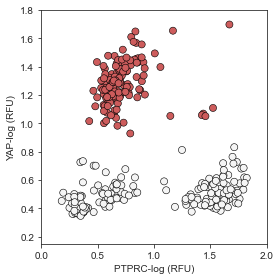

In [20]:
# Plot microcapsules with YAP signal

X0, X1 = 0, 2.0
Y0, Y1 = 0.15, 1.8


color_dict = {'ACTB':'whitesmoke',
              'PTPRC':'whitesmoke',
              'YAP': 'indianred',
              
              
              'ACTB & Nuclei': 'whitesmoke',
              'PTPRC & Nuclei': 'whitesmoke',
              'YAP & Nuclei':'indianred',
              
              'ACTB & PTPRC': 'whitesmoke',
              'ACTB & YAP': 'indianred',
              'PTPRC & YAP': 'indianred',
              'ACTB,PTPRC & YAP': 'indianred',
              
              'ACTB,PTPRC & Nuclei': 'whitesmoke',
              'ACTB,YAP & Nuclei': 'indianred',
              'PTPRC,YAP & Nuclei':'indianred',
              'ACTB,PTPRC,YAP & Nuclei': 'indianred',
 
              'Nuclei': 'whitesmoke'}

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.xlim(X0,X1)
plt.ylim(Y0,Y1)

sns.scatterplot(data=cells_ambient, x="PTPRC-log", y="YAP-log", hue = 'Final marker', palette=color_dict, legend=False,edgecolor="k", s=50)

plt.xlabel("PTPRC-log (RFU)")
plt.ylabel("YAP-log (RFU)")

plt.tight_layout()

plt.savefig("YAP.svg", format="svg", dpi=300)

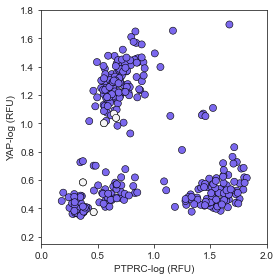

In [21]:
# Plot microcapsules with ACTB signal

X0, X1 = 0, 2.0
Y0, Y1 = 0.15, 1.8


color_dict = {'ACTB':'mediumslateblue',
              'PTPRC':'whitesmoke',
              'YAP': 'whitesmoke',
              
              
              'ACTB & Nuclei': 'mediumslateblue',
              'PTPRC & Nuclei': 'whitesmoke',
              'YAP & Nuclei':'whitesmoke',
              
              'ACTB & PTPRC': 'mediumslateblue',
              'ACTB & YAP': 'mediumslateblue',
              'PTPRC & YAP': 'whitesmoke',
              'ACTB,PTPRC & YAP': 'mediumslateblue',
              
              'ACTB,PTPRC & Nuclei': 'mediumslateblue',
              'ACTB,YAP & Nuclei': 'mediumslateblue',
              'PTPRC,YAP & Nuclei':'whitesmoke',
              'ACTB,PTPRC,YAP & Nuclei': 'mediumslateblue',
 
              'Nuclei': 'whitesmoke'}

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
plt.xlim(X0,X1)
plt.ylim(Y0,Y1)

sns.scatterplot(data=cells_ambient, x="PTPRC-log", y="YAP-log", hue = 'Final marker', palette=color_dict, legend=False,edgecolor="k", s=50)
sns.scatterplot(data=cells_ambient[cells_ambient['Final marker'] == "YAP"], x="PTPRC-log", y="YAP-log", edgecolor="k",hue = 'Final marker',palette=color_dict, s=50, legend=False)
sns.scatterplot(data=cells_ambient[cells_ambient['Final marker'] == "YAP & Nuclei"], x="PTPRC-log", y="YAP-log", edgecolor="k",hue = 'Final marker',palette=color_dict, s=50, legend=False)
sns.scatterplot(data=cells_ambient[cells_ambient['Final marker'] == "Nuclei"], x="PTPRC-log", y="YAP-log", edgecolor="k",hue = 'Final marker',palette=color_dict, s=50, legend=False)


plt.xlabel("PTPRC-log (RFU)")
plt.ylabel("YAP-log (RFU)")

plt.tight_layout()

plt.savefig("ACTB.svg", format="svg", dpi=300)

In [22]:
# Evaluate the number of each population

In [23]:
sum(cells_ambient["Final marker"]=="ACTB")

43

In [24]:
sum(cells_ambient["Final marker"]=="PTPRC")

0

In [25]:
sum(cells_ambient["Final marker"]=="YAP")

0

In [26]:
sum(cells_ambient["Final marker"]=="ACTB & PTPRC")

0

In [27]:
sum(cells_ambient["Final marker"]=="ACTB & YAP")

2

In [28]:
sum(cells_ambient["Final marker"]=="PTPRC & YAP")

0

In [29]:
sum(cells_ambient["Final marker"]=="ACTB,PTPRC & YAP")

0

In [30]:
sum(cells_ambient["Final marker"]=="ACTB & Nuclei")

39

In [31]:
sum(cells_ambient["Final marker"]=="PTPRC & Nuclei")

0

In [32]:
sum(cells_ambient["Final marker"]=="YAP & Nuclei")

3

In [33]:
sum(cells_ambient["Final marker"]=="ACTB,PTPRC & Nuclei")

92

In [34]:
sum(cells_ambient["Final marker"]=="ACTB,YAP & Nuclei")

117

In [35]:
sum(cells_ambient["Final marker"]=="PTPRC,YAP & Nuclei")

0

In [36]:
sum(cells_ambient["Final marker"]=="ACTB,PTPRC,YAP & Nuclei")

7

In [37]:
sum(cells_ambient["Final marker"]=="Nuclei")

2

In [39]:
sum(cells_ambient["Final marker"]=="Empty")

0